## Доверительный интервал

Пусть известна выборка $X = \{x_1,\ldots, x_n\}$ из некоторого распределения.

_Случайный интервал $(\overline \theta, \underline \theta) \subseteq \mathbb R$, границы которого $\overline \theta =\overline \theta (X)$, $\underline \theta =\underline \theta (X)$ являются статистиками, называется **доверительным интервалом для параметра $\theta$**, если этот интервал «накрывает» истинное значение $\theta$ с наперед заданной достаточно большой вероятностью $1-\varepsilon$:_
$$\forall \theta \in \mathbb R\ P\{\underline \theta < \theta < \overline \theta\} = 1-\varepsilon,$$
_при этом величина $1-\varepsilon$ называется **доверительным числом, или доверительным уровнем**._

На практике доверительные вероятности обычно выбираются
стандартным образом:
$$\varepsilon \in \{0.1,\ 0.05,\ 0.01,\ 0.005,\ 0.001\}.$$

Доверительная вероятность ни в коей мере не является вероятностью неизвестному параметру $\theta$ принадлежать доверительному интервалу, поскольку никаких априорных сведений о $\theta$ мы не имеем.

### t-распределение Стъюдента

_Пусть $\xi_0,\xi_1,\ldots, \xi_n \sim \mathcal N(0,1)$. Тогда распределение случайной величины $t$
$$t = \dfrac{\xi_0}{\sqrt{\frac 1 n \sum\limits_{i=1}^n \xi_i^2}}$$
называется **распределением Стъюднента с $n$ степенями свободы**_

Отличительная черта -- при $n\geqslant 30$ оно практически совпадает с нормальным распределением.

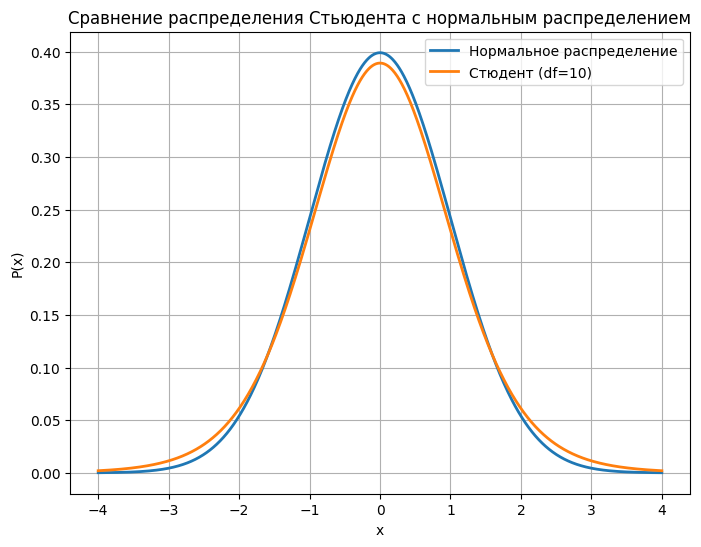

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t, chi2

x = np.linspace(-4, 4, 1000)
normal_pdf = norm.pdf(x)

dfs = 10  # Число степеней свободы

plt.figure(figsize=(8, 6))

plt.plot(x, normal_pdf, label='Нормальное распределение', lw=2)
student_pdf = t.pdf(x, dfs)
plt.plot(x, student_pdf, label=f'Стюдент (df={dfs})', lw=2)

plt.title('Сравнение распределения Стьюдента с нормальным распределением')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.legend()
plt.grid()
plt.show()

### Хи-квадрат распределение

_Пусть $\xi_1,\ldots, \xi_n \sim \mathcal N(0,1)$. Тогда распределение случайной величины $\chi^2$
$$\chi^2 = \xi_1^2 + \ldots + \xi_n^2$$
называется **распределением Хи-Квадрат с $n$ степенями свободы**_

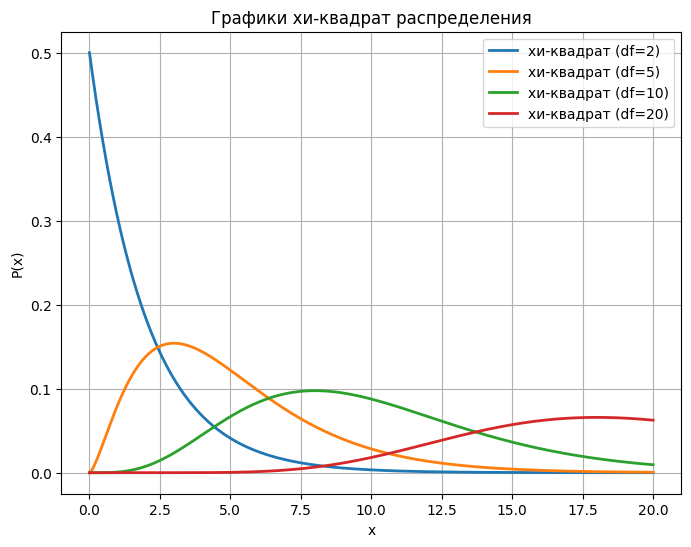

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

x = np.linspace(0, 20, 1000)

dfs = [2, 5, 10, 20]  # Число степеней свободы

plt.figure(figsize=(8, 6))

for df in dfs:
    chi2_pdf = chi2.pdf(x, df)
    plt.plot(x, chi2_pdf, label=f'хи-квадрат (df={df})', lw=2)

plt.title('Графики хи-квадрат распределения')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.legend()
plt.grid()
plt.show()

### Доверительные интервалы для нормального распределения

По классике доверительные интервалы строят именно для параметров нормального распределения. Для построения доверительных интервалов существуют методы:
- обратной функции;
- Стъюдента;
- ассимптотических интервалов.

С помощью этих методов строятся следующие доверительные интервалы для параметров нормального распределения

- для среднего в случае **известной дисперсии** (для $n \geqslant 30$)
$$\underline \theta = \overline x - \Phi\left(1-\dfrac \varepsilon 2\right) \cdot \dfrac{\sigma}{\sqrt n},\ \overline \theta = \overline x + \Phi\left(1-\dfrac \varepsilon 2\right) \cdot \dfrac{\sigma}{\sqrt n},$$
где $\Phi(\cdot)$ -- это функция распределения стандартного нормального распредедения
$$\Phi(z) = \dfrac{1}{\sqrt{2\pi}} \int\limits_{-\infty}^{z} e ^{-\frac {x^2}{2}}dx;$$

- для среднего в случае **неизвестной дисперсии** (для $n < 30$)
$$\underline \theta = \overline x - t_{n-1,\left(1-\frac \varepsilon 2\right)} \cdot \dfrac{S_n}{\sqrt n},\ \overline \theta = \overline x + t_{n-1,\left(1-\frac \varepsilon 2\right)} \cdot \dfrac{S_n}{\sqrt n},$$

- для среднего в случае **неизвестной дисперсии** (для $n \geqslant 30$)
$$\underline \theta = \overline x - \Phi\left(1-\dfrac \varepsilon 2\right)\cdot \dfrac{S_n}{\sqrt n},\ \overline \theta = \overline x + \Phi\left(1-\dfrac \varepsilon 2\right)\cdot \dfrac{S_n}{\sqrt n},$$

- для дисперсии
$$\underline \theta = \dfrac{S_n^2\cdot(n-1)}{\chi^2_{n-1, 1-\frac {\varepsilon} {2}}},\ \overline \theta = \dfrac{S_n^2\cdot (n-1)}{\chi^2_{n-1, \frac \varepsilon 2}}.$$

In [2]:
n = 10

real_mean = 4.3
real_variance = 5.44

norm_distribution = norm(real_mean, np.sqrt(real_variance))
data = norm_distribution.rvs(n, random_state=42)
print(data)

[5.45852653 3.977515   5.81065628 7.85228553 3.75386517 3.75390347
 7.98332558 6.08995    3.20500698 5.56545661]


In [8]:
confidence_level = 0.95
epsilon = 1 - confidence_level

n = len(data)
mean = np.mean(data)
variance = np.var(data, ddof=1)
std_dev = np.sqrt(variance)

print(f"Среднее: {mean}, \nНесмещенная дисперсия: {variance}, \nСтандартное отклонение: {std_dev}")

Среднее: 5.3450491153065425, 
Несмещенная дисперсия: 2.8437113132884138, 
Стандартное отклонение: 1.686330724765582


Пусть дисперсия известна, и мы строим оценку для среднего

In [5]:
z = norm.ppf(1 - epsilon / 2)
margin_of_error_known = z * np.sqrt(real_variance/n)
ci_known_variance = (mean - margin_of_error_known, mean + margin_of_error_known)

print(f"Доверительный интервал для среднего (известная дисперсия): {ci_known_variance}")


Доверительный интервал для среднего (известная дисперсия): (3.8994511080937473, 6.790647122519338)


Пусть дисперсия не известна, и мы строим оценку для среднего

In [6]:
t_critical = t.ppf(1 - epsilon / 2, df=n - 1)
margin_of_error_unknown = t_critical * (std_dev / np.sqrt(n))
ci_unknown_variance = (mean - margin_of_error_unknown, mean + margin_of_error_unknown)

print(f"Доверительный интервал для среднего (неизвестная дисперсия): {ci_unknown_variance}")

Доверительный интервал для среднего (неизвестная дисперсия): (4.138720785565161, 6.551377445047924)


Строим оценку для дисперсии

In [10]:
chi2_lower = chi2.ppf(epsilon / 2, df=n - 1)
chi2_upper = chi2.ppf(1 - epsilon / 2, df=n - 1)
ci_variance = ((n - 1) * variance / chi2_upper, (n - 1) * variance / chi2_lower)

print(f"Доверительный интервал для дисперсии: {ci_variance}")

Доверительный интервал для дисперсии: (1.3454089378845955, 9.47767046930892)


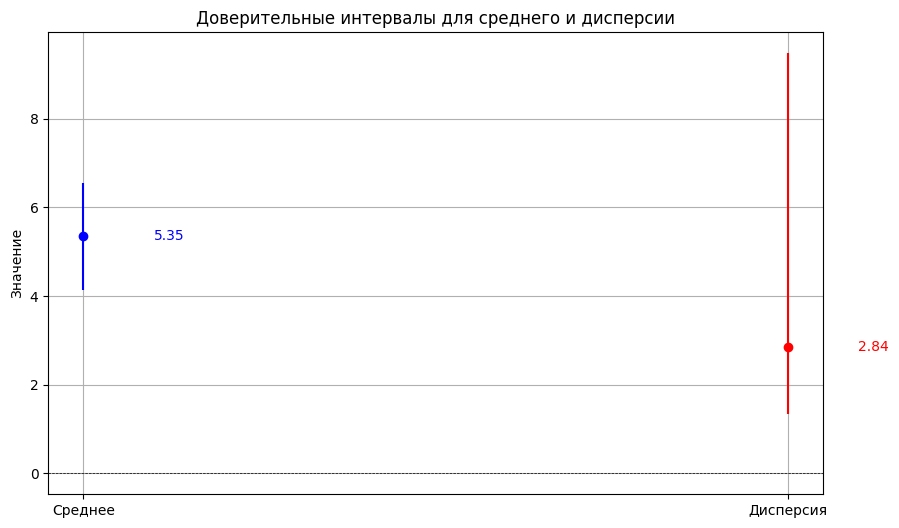

In [11]:
plt.figure(figsize=(10, 6))

plt.errorbar(1, mean, yerr=[[mean - ci_unknown_variance[0]], [ci_unknown_variance[1] - mean]], fmt='o', label='Среднее', color='blue')
plt.text(1.1, mean, f'{mean:.2f}', verticalalignment='center', color='blue')

plt.errorbar(2, variance, yerr=[[variance - ci_variance[0]], [ci_variance[1] - variance]], fmt='o', label='Дисперсия', color='red')
plt.text(2.1, variance, f'{variance:.2f}', verticalalignment='center', color='red')

plt.xticks([1, 2], ['Среднее', 'Дисперсия'])
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.title('Доверительные интервалы для среднего и дисперсии')
plt.ylabel('Значение')
plt.grid()
plt.show()

## Статистическая проверка гипотез

**Статистической гипотезой** будем называть любое предположение о виде теоретической функции распределения $F_\xi(x)$.

Например: «вероятность успеха в схеме Бернулли равна 1/2» или «теоретическая
функция распределения является нормальной с нулевым математическим ожиданием».

Примерами непараметрических гипотез служат высказывания: «теоретическая
функция распределения является нормальной» или «теоретическая функция распределения имеет положительное математическое ожидание».

В дальнейшем будем предполагать, что у нас имеются две непересекающиеся
гипотезы $H_0$ и $H_1$. Гипотезу $H_0$ будем называть **основной**, а гипотезу $H_1$ – **альтернативной**.

**Задача проверки статистических гипотез** состоит в том,
чтобы по выборке $X = \{x_1,\ldots,x_n\}$
принять, то есть считать справедливой, либо
основную гипотезу $H_0$, либо конкурирующую гипотезу $H_1$.

**Статистическим критерием** называется правило, позволяющее, основываясь только на выборке $X = \{x_1,\ldots,x_n\}$, принять либо основную
гипотезу $H_0$, либо конкурирующую гипотезу $H_1$.

**Критерий Колмогорова**.
Мы можем сравнить эмпирическую функцию распределения $F_n(x)$ с гипотетической
функцией распределения $F_\xi(x)$ и считать гипотезу $H_0$ справедливой, если мера расхождения между ними мала. В качестве статистики выбирается нормированное растоение между функицями
$$\rho = \sqrt n \underset{x\in \mathbb R}{\sup}|F_n(x) - F_\xi(x)|.$$
Критерий Колмогорова предписывает принять гипотезу $H_0$, если $\rho < С$, и принять гипотезу $H_1$, если $\rho \geq C$, где $С$ – критическое значение критерия.

In [ ]:
import pandas as pd

data = pd.read_csv('data.csv')
data

,X,Y
0,9,1.036766
1,5,9.137511
2,6,6.108730
3,5,0.640862
4,4,5.549188
...,...,...
95,6,6.296571
96,3,2.703184
97,5,21.733902
98,4,0.739480


In [ ]:
X = data['X'].values
X

array([ 9,  5,  6,  5,  4,  3,  6,  5,  1,  9,  4,  5,  2,  2,  5,  6,  4,
        4,  7,  5,  3,  6,  3,  4,  4,  5,  4,  5,  5,  6,  4,  8,  5,  4,
        4,  4,  6,  5,  6,  4,  4,  6,  5,  5,  2,  4,  3,  5, 11,  4,  5,
        5,  3,  2,  4,  7,  8,  3,  3,  5,  7,  3,  9,  7,  9,  2,  8,  2,
        7,  2,  4,  2,  4,  7,  2,  7,  5,  5,  4,  9,  5,  5,  2,  3,  5,
        3,  5,  5,  7,  4,  6,  4,  3,  2,  4,  6,  3,  5,  4, 10])

In [ ]:
from scipy.stats import kstest, poisson

lambda_param = np.mean(X)
theoretical_distribution = poisson(mu=lambda_param)

statistic, p_value = kstest(X, theoretical_distribution.cdf)

print(f"Оценка λ (математическое ожидание): {lambda_param}")
print(f"Статистика критерия Колмогорова-Смирнова: {statistic}")
print(f"P-значение: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Гипотеза о распределении Пуассона отклоняется.")
else:
    print("Гипотеза о распределении Пуассона принимается.")

Оценка λ (математическое ожидание): 4.82
Статистика критерия Колмогорова-Смирнова: 0.2326242797180743
P-значение: 3.05406998344293e-05
Гипотеза о распределении Пуассона отклоняется.


In [ ]:
from scipy.stats import kstest, expon

Y = data['Y'].values

lambda_param = 1 / np.mean(Y)

theoretical_distribution = expon(scale=1/lambda_param)

statistic, p_value = kstest(Y, theoretical_distribution.cdf)

print(f"Оценка λ (параметр экспоненциального распределения): {lambda_param}")
print(f"Статистика критерия Колмогорова-Смирнова: {statistic}")
print(f"P-значение: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Гипотеза о соответствии экспоненциальному распределению отклоняется.")
else:
    print("Гипотеза о соответствии экспоненциальному распределению принимается.")

Оценка λ (параметр экспоненциального распределения): 0.14324641779784097
Статистика критерия Колмогорова-Смирнова: 0.08914606383490217
P-значение: 0.38214146051230596
Гипотеза о соответствии экспоненциальному распределению принимается.


В итоге алгоритм тестирования гипотез заключается в следующем:

`p-value` -  вероятность, что полученное оценочное значение относится к $H_0$.  

Если `p-value >` уровня значимости - $H_0$ не отвергается  
Если `p-value <` уровня значимости - $H_0$ отвергается   

In [ ]:
data = pd.read_csv('StudentsPerformance.csv')
display(data.head())

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
selection_1 = data['math score'].iloc[: len(data['math score'])// 2]
selection_2 = data['math score'].iloc[len(data['math score'])// 2: ]

In [ ]:
selection_1

0      72
1      69
2      90
3      47
4      76
       ..
495    68
496    54
497    59
498    66
499    76
Name: math score, Length: 500, dtype: int64

In [ ]:
selection_2

500    74
501    94
502    63
503    95
504    40
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 500, dtype: int64

In [ ]:
s1_mean = selection_1.mean()
s2_mean = selection_2.mean()
print(s1_mean, s2_mean)

65.714 66.464


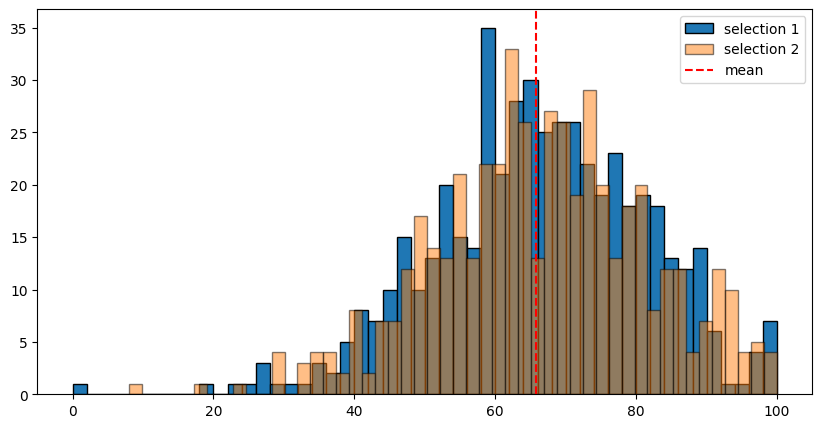

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(selection_1, bins=50, edgecolor='black', label='selection 1')
plt.hist(selection_2, bins=50, edgecolor='black', alpha=0.5, label='selection 2')
plt.axvline(s1_mean, linestyle='--', c='r', label='mean')
plt.legend();


### Гипотеза о `нормальности распределения`
- $H_0 :$ распределение выборки нормальное
- $H_1 :$ распределение выборки ненормальное

Параметры теста **Шапиро-Уиллка**
- pvalue : вероятность, что данные выборки распределены нормально
- stats : стремится к 1 при нормальном распределениии данных выборки

`from scipy.stats import shapiro`

In [ ]:
from scipy.stats import shapiro

alpha = 0.05
stats, pvalue = shapiro(selection_1)
if pvalue > alpha:
    print('У Selection 1 Распределение не нормальное')
elif pvalue < alpha:
    print('У Selection 1 Распределение нормальное')

alpha = 0.05
stats, pvalue = shapiro(selection_2)
if pvalue > alpha:
    print('У Selection 2 Распределение не нормальное')
elif pvalue < alpha:
    print('У Selection 2 Распределение нормальное')


У Selection 1 Распределение нормальное
У Selection 2 Распределение нормальное


### Гипотеза о `равенстве дисперсий`
- $H_0 :$ дисперсии обеих выборок одинаковы
- $H_1 :$ дисперсии обеих выборок различны

Параметры теста **Левена**
- pvalue : вероятность, что дисперсии для обеих выборок одинаковы
- stats : стремится к 1 при больших различиях дисперсий

`from scipy.stats import levene`

In [ ]:
from scipy.stats import levene

alpha = 0.05
stats, pvalue = levene(selection_1, selection_2)
if pvalue > alpha:
    print('У выборок дисперсии равны')
elif pvalue < alpha:
    print('У выборок дисперсии не равны')

У выборок дисперсии равны


### Гипотеза о `равенстве средних`

- $H_0 :$ средние обеих выборок одинаковы
- $H_1 :$ средние обеих выборок различны

Условия примененеия **Т-теста Стьюдента**:
- Данные обеих выборок `независимы`
- Обе выборки имеют близкое к нормальному распределению
- Дисперсии одинаковы для обеих выборок  

Параметры **Т-теста Стьюдента**
- pvalue : вероятность, что средние для обеих выборок одинаковы

`from scipy.stats import ttest_ind`

In [ ]:
from scipy.stats import ttest_ind

alpha = 0.05
stats, pvalue = ttest_ind(selection_1, selection_2)
if pvalue > alpha:
    print(f'У выборок средние равны, p-value={pvalue:.3f}')
elif pvalue < alpha:
    print(f'У выборок средние не равны, p-value={pvalue}')

У выборок средние равны, p-value=0.434


### Гипотеза о `корреляции данных`

- $H_0 :$ данные выборок независимы
- $H_1 :$ данные выборок зависимы

Условия примененеия **теста Пирсона**:

- Обе выборки имеют близкое к `нормальному распределению`
- `Дисперсии одинаковы` для обеих выборок  

Параметры **теста Пирсона**
- pvalue : вероятность, что данные выборок независимы

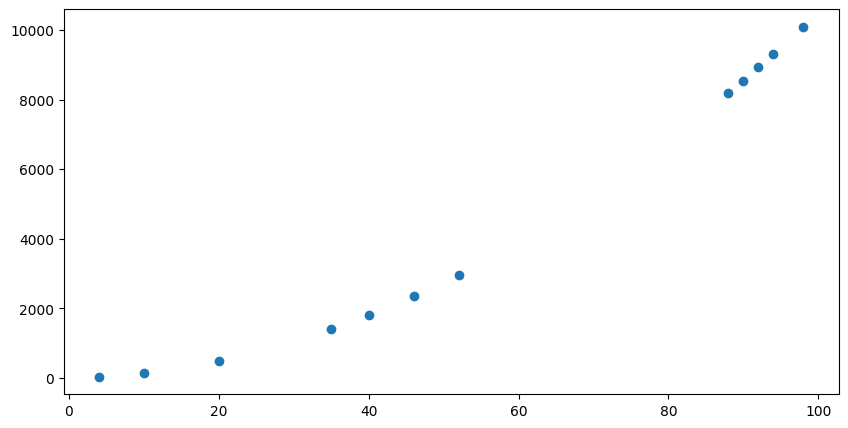

In [ ]:
from scipy.stats import pearsonr

x = np.array([46, 92, 40, 88, 94, 20, 10, 4, 98, 52, 35, 90])
func = lambda x: (x**2)+x*5
y = func(x)
plt.figure(figsize=(10,5))
plt.scatter(x,y)

In [ ]:
alpha = 0.05
stats, pvalue = pearsonr(x,y)
if pvalue > alpha:
    print(f'Данные выборок независимы, p-value={pvalue}')
elif pvalue < alpha:
    print(f'Данные выборок зависимы, p-value={pvalue}')

Данные выборок зависимы, p-value=2.7098714379644847e-08
